<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/PressureDiffusion_1D_Reservoir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulating the Pressure Diffusivity equation in space and time 



## This is not a successful code, but just an illustration of how the Explicit method is very unstable normally. It diverges, which can be seen if you run the code. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pylab as pl
from IPython import display
import time

In [7]:
def diff_const():
  ''' 
  Calculates the Diffusivity Constant 

  '''
  k = int(input('Enter the reservoir permeability: '))

  phi = float(input('Enter the res porosity: '))

  ct = float(input('Enter the total formation comp. (1/psi): '))

  u = float(input('Enter the oil viscosity in cp: '))

  dc = (0.0002637*k)/(phi*u*ct)

  return dc

In [17]:
L = 1000 #ft Reservoir length 1D

n = 5 #gridblocks 

Pi = 3000 #psia

P = np.ones(n)*Pi

dx = L/n

x = np.linspace(dx/2 , L - dx/2 , n)


t_final = 10 # hours

dt = 0.1 #hour

# eeta = diff_const()

t = np.arange(0,t_final,dt)


P_w = 3000 #psi 


P_e = 200 #psi


dPdt = np.empty(n)

eeta = diff_const()





Enter the reservoir permeability: 150
Enter the res porosity: 0.25
Enter the total formation comp. (1/psi): 0.000001
Enter the oil viscosity in cp: 100


In [4]:
0.0002637*150/(0.25*100*0.00001)
# 15822*1/(200**2)

158.22

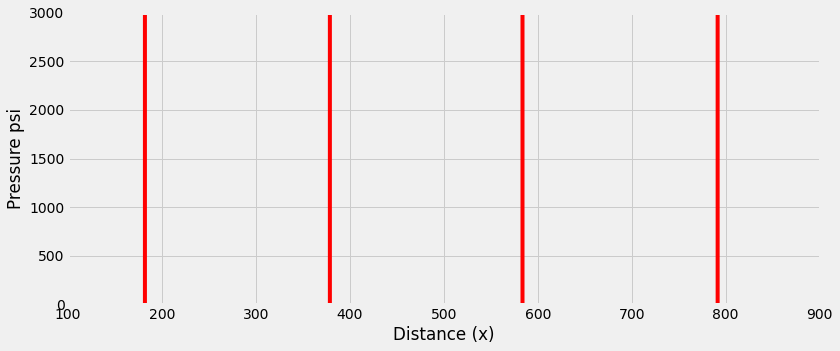

KeyboardInterrupt: ignored

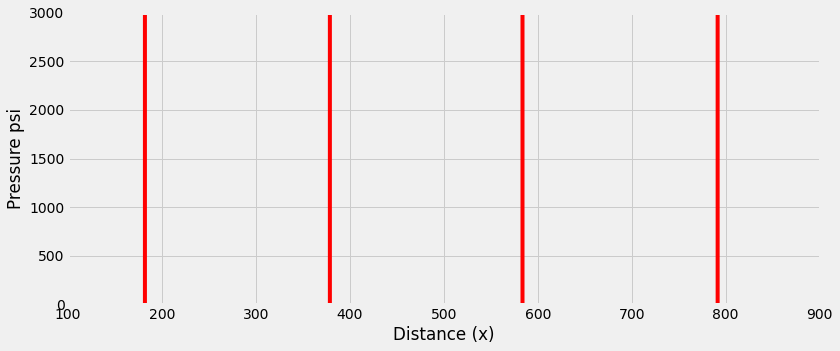

In [18]:
# ((  Pi+1 - 2Pi + Pi-1 )/dx2 ) *eeta*dt + P(t) = P(t+1)

P_hist = [3000]

ax1 = plt.figure(figsize=(12,5))
plt.grid()
plt.style.use('fivethirtyeight')
plt.title('Pressure Diffusion Through a Reservoir - A simulation in time!')
# plt.axis([0,L,0,50])

for j in range(len(t)):
  plt.clf()

  for i in range(1,n-1):

    dPdt[i] = eeta*(P[i+1]-2*P[i]+ P[i-1])/(dx**2)

  dPdt[0] = eeta*(2*P_w - 3*P[0] + P[1])/(dx**2)
  dPdt[n-1] = eeta*(P[n-2] -3*P[n-1] + P_e)/(dx**2)

  P = P - dPdt



   # plt.figure(1)
  plt.plot(x,P,'r')

  plt.xlim(dx/2,L-dx/2)
  plt.ylim(0,3000)
  # plt.axis([0,L,0,50])
  # plt.show()
 
  plt.xlabel('Distance (x)')
  plt.ylabel('Pressure psi')
  
  display.clear_output(wait=True)
  display.display(pl.gcf())
  time.sleep(1.0)



    





In [ ]:
PRe